<a href="https://colab.research.google.com/github/faizan1402/Natural_Language_Processing/blob/main/Sms_Spam_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loaading The DataSet**

In [ ]:
# Step -1

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file = '/content/drive/MyDrive/Colab Notebooks/Sms_Spam_Filter_Simple_Projects/SMSSpamCollection.txt'
data = pd.read_csv(file,sep = '\t',header = None,names = ['label','sms'])
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#**Pre-Processing**

In [ ]:
# Preprocessing means cleaning the data process the data
# Stop words and punctuation 
import string #finding the words 
import nltk
nltk.download('stopwords')# stop words
nltk.download('punkt') # stop punctuation

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

print(stopwords[:5])# stop the very shot length so list of size 5 
print(punctuation)
# So stop words -> [i,me,my,myself] ->5 words are stop
# punctuation all stoped -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['i', 'me', 'my', 'myself', 'we']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
 # Pre-Process sms content

def pre_process(sms):
  lowercase = [char.lower() for char in sms]
  return lowercase
  

In [ ]:
mylist = ['apples','banana','mango']


In [ ]:
for item in mylist:
  print(item)

apples
banana
mango


In [ ]:
# Pre-Process sms content

def pre_process(sms):
  lowercase = [char.lower() for char in sms]

  return lowercase
data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data.head()
  

,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...","[g, o, , u, n, t, i, l, , j, u, r, o, n, g, ..."
1,ham,Ok lar... Joking wif u oni...,"[o, k, , l, a, r, ., ., ., , j, o, k, i, n, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[f, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
3,ham,U dun say so early hor... U c already then say...,"[u, , d, u, n, , s, a, y, , s, o, , e, a, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[n, a, h, , i, , d, o, n, ', t, , t, h, i, ..."


In [ ]:
def pre_process(sms):
  lowercase = "".join([char.lower() for char in sms])
  return lowercase
data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data.head()
  

,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [ ]:
# pre-process sms content

def pre_process(sms):# so remove the process function
  lowercase = "".join([char.lower() for char in sms])
  
  # remove punctuation
  remove_punct = "".join([char for char in sms if char not in punctuation]) #list comprehension
  return remove_punct

  #return lowercase
data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data.head()
  



,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [ ]:
# stop words tokenization
def pre_process(sms):
  lowercase = "".join([char.lower() for char in sms if char not in punctuation])
  tokenize = nltk.tokenize.word_tokenize(lowercase)
 
  return tokenize 
  data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data.head()
  

,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [ ]:
# remove stop words 

def pre_process(sms):
  remove_punct = "".join([word.lower() for word in sms if word not in punctuation])
  tokenize = nltk.tokenize.word_tokenize(remove_punct)
  remove_stopwords = [word for word in tokenize if word not in stopwords]
  return remove_stopwords
# adding a coloumn to our data our processed messages

  data['processed'] = data['sms'].apply(lambda x: pre_process(x))
data.head()
  


,label,sms,processed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


#**Step -1 Loading The Data**

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_url = '/content/drive/MyDrive/Colab Notebooks/Sms_Spam_Filter_Simple_Projects/SMSSpamCollection.txt'

data = pd.read_csv(file_url, sep = '\t', header=None, names=["label", "sms"])
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#finding the 
data

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#**Step-2 Pre Processing**

In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

print(stopwords[:5])
print(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we']
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# **Step -3 Categorizing and Counting Tokens** 

In [ ]:
def pre_process(sms):
    remove_punct = "".join([word.lower() for word in sms if word not in punctuation])
    tokenize = nltk.tokenize.word_tokenize(remove_punct)
    remove_stopwords = [word for word in tokenize if word not in stopwords]
    return remove_stopwords

#adding a column to our data with our processed messages
data['processed'] = data['sms'].apply(lambda x: pre_process(x))

print(data['processed'].head())

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: processed, dtype: object


#**Step -4 Predict Function**

In [ ]:
def categorize_words():
    spam_words = []
    ham_words = []
    #handling messages associated with spam
    for sms in data['processed'][data['label'] == 'spam']:
        for word in sms:
            spam_words.append(word)
    #handling messages associated with ham
    for sms in data['processed'][data['label'] == 'ham']:
        for word in sms:
            ham_words.append(word)
    return spam_words, ham_words

spam_words, ham_words = categorize_words()

print(spam_words[:5])
print(ham_words[:5])

['free', 'entry', '2', 'wkly', 'comp']
['go', 'jurong', 'point', 'crazy', 'available']


#**Step -5 Collecting User Input & Results**

In [ ]:
def predict(sms):
    spam_counter = 0
    ham_counter = 0
    #count the occurances of each word in the sms string
    for word in sms:
        spam_counter += spam_words.count(word)
        ham_counter += ham_words.count(word)
    print('***RESULTS***')
    #if the message is ham
    if ham_counter > spam_counter:
        accuracy = round((ham_counter / (ham_counter + spam_counter) * 100))
        print('messege is not spam, with {}% certainty'.format(accuracy))
    #if the message could be equally spam and ham
    elif ham_counter == spam_counter:
        print('message could be spam')
    #if the message is spam
    else:
        accuracy = round((spam_counter / (ham_counter + spam_counter)* 100))
        print('message is spam, with {}% certainty'.format(accuracy))

In [ ]:
user_input = input("Please type a spam or ham message to check if our function predicts accurately\n")
#pre-processing the input before prediction
processed_input = pre_process(user_input)

predict(processed_input)


Please type a spam or ham message to check if our function predicts accurately
Hi Faizan Ahmad how are you best wishes to for your career
***RESULTS***
messege is not spam, with 87% certainty


In [ ]:
data.isnull().sum()

label        0
sms          0
processed    0
dtype: int64

In [ ]:
len(data)

5572

In [ ]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

#**Plot The Histogram Plot**

In [ ]:
#Scikit Learn 
# Machine Learning algorithm

AttributeError: ignored

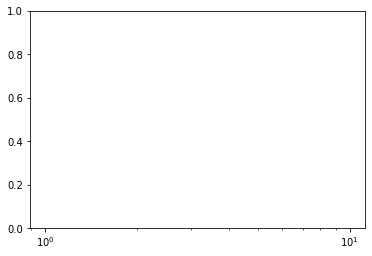

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np


%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arrange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()